In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state= 3)

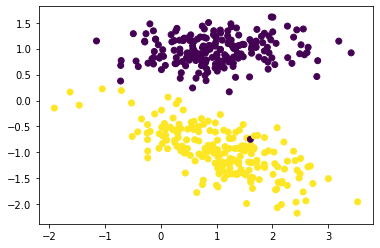

In [3]:
plt.scatter(X[:,0] , X[:,1],  c = Y)
plt.show()

### Convert Y into {-1,1}

In [4]:
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]


In [5]:
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

In [6]:
class svm : 
    def __init__(self , c = 1.0):
        self.c = c 
        self.w = 0 
        self.b = 0
    def hingeloss(self,X, Y, w, b):
        loss = 0.0
        loss += 0.5*np.dot( w , w.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(w , X[i].T) + b)
            loss += self.c * max( 0 , (1 - ti))
        return loss[0][0]                     
    def fit(self, X, Y , batch_size = 100 , learning_rate = 0.001 , maxitr = 300):
        m = X.shape[0]
        no_of_features = X.shape[1]
        
        n = learning_rate
        #initial parameters
        w = np.zeros((1,no_of_features))
        b = 0
        c = self.c
        
        losses = []
        for i in range(maxitr):
            
            l = self.hingeloss( X , Y , w , b)
            losses.append(l)
            
            ids = np.arange(m)
            np.random.shuffle(ids)
            
            for batch_start in range( 0 , m , batch_size ):
                
                gradw = 0
                gradb = 0
                
                for j in range(batch_start , batch_start + batch_size ):
                    if j < m :
                        i = ids[j]
                        ti = Y[i]*(np.dot(w,X[i].T) + b)
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                        
                        w = w - n*w + n*gradw
                        b = b + n*gradb
        self.w = w
        self.b = b
        return w,b,losses
                 

In [7]:
mysvm = svm(c = 1.0)
#loss = mysvm.hingeloss(X, Y, w,b)
#print(loss)
w,b,loss = mysvm.fit(X,Y , maxitr = 300)

In [8]:
print(w)
print(b)
print(loss[0])
print(loss[-1])

[[-0.28120703 -2.05913814]]
0.41400000000000037
400.0
17.682804852095895


In [9]:
print(len(loss))

300


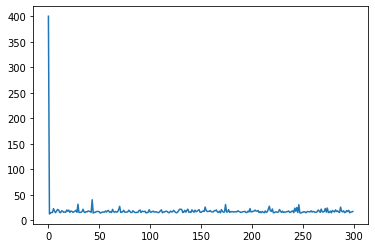

In [10]:
plt.plot(loss)

## Plot The Hyperplane

In [11]:
def plotHypeplane( w1 , w2 , b):
    plt.figure(figsize = (12,12))
    plt.scatter(X[:,0] , X[:,1] , c = Y)
   # plt.show()
   # plt.figure(figsize = (12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -( w1 *x1 + b )/w2   #w1x1 + w2x2 + b = 0
    xp = -( w1*x1 + b + 1)/w2 #w1x1 +w2x2 + b = 1
    xn = -( w1*x1 + b - 1)/w2 #w1x1 +w2x2 + b = -1
    
    plt.plot(x1 , x2 , label = 'WT + B = 0')
    plt.plot(x1 , xp , label = ' +ve WT + B = 1')
    plt.plot(x1 , xn , label = '-ve WT + B = -1')
    plt.show()

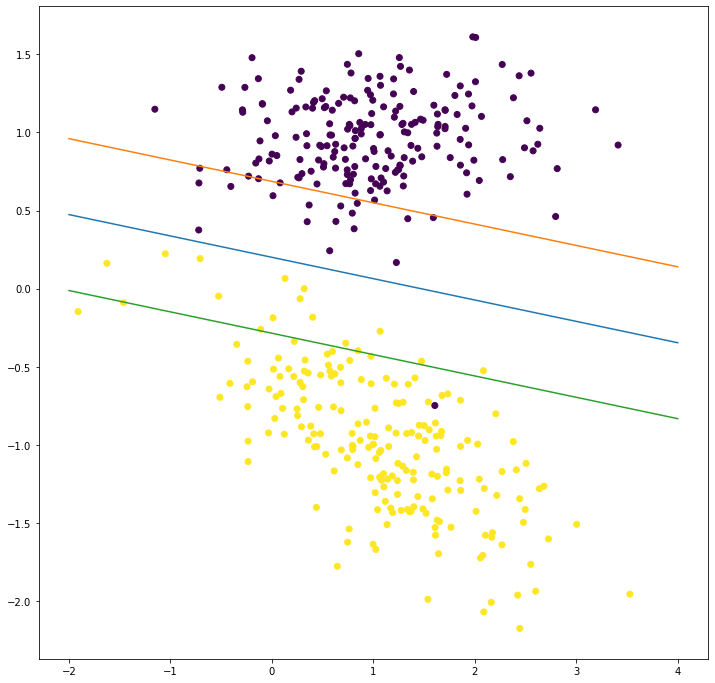

In [12]:
plotHypeplane( w[0,0] , w[0,1] , b)

### panelty constant c = 1000.abs0

In [22]:
#c = 1000.0
mysvm1 = svm(c = 1000.0)
#loss = mysvm.hingeloss(X, Y, w,b)
#print(loss)
w,b,loss = mysvm1.fit(X,Y , maxitr = 300)

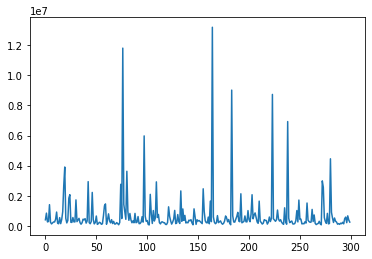

In [23]:
plt.plot(loss)

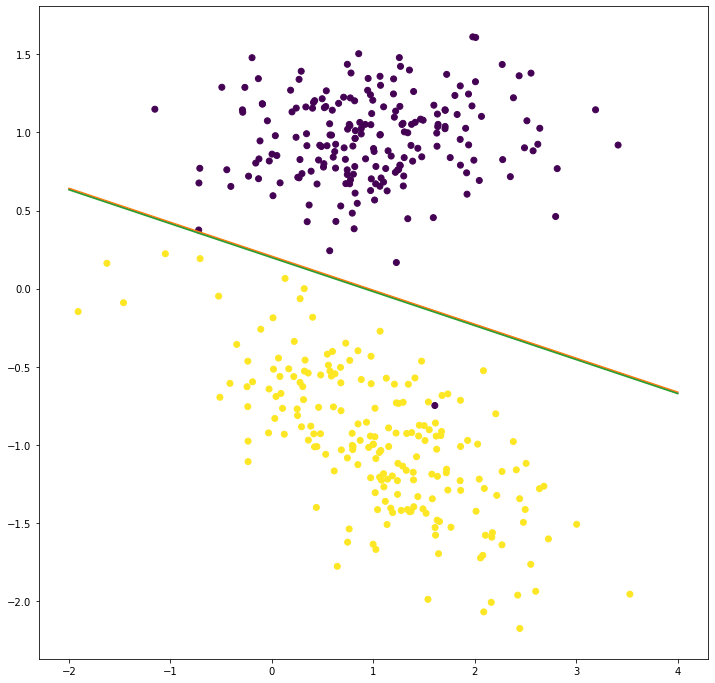

In [24]:
plotHypeplane( w[0,0] , w[0,1] , b)